In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0})
train['Age'].fillna(.05, inplace=True)
train['Embarked'] = train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
train['Embarked'].fillna(99, inplace=True)

In [19]:
# with 'Pclass','Parch', 'Fare','Age', 'Sex','Embarked'
lm = LinearRegression()
X = train[['Pclass','Parch', 'Fare','Age', 'Sex','Embarked']]
y = train['Survived']
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

0.3871569666901101


In [20]:
0.3871569666901101

True

In [29]:
# with 'Pclass','Parch'
lm = LinearRegression()
X = train[['Pclass','Parch']]
y = train['Survived']
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

0.4575042935147202


In [30]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6184666893655657, 0.6397522982635342, 0.6388293042787424, 0.6600658268073999, 0.6814274770173647, 0.6791048121666099, 0.6623008171603677, 0.6746603677221655, 0.6882589944387697, 0.6882201225740552, 0.6826021450459653, 0.6882073544433094, 0.6961491317671094, 0.7039643627284077, 0.7073351492452616, 0.7005297355578255, 0.7016533310634434, 0.6859229939847917, 0.6803050164567018, 0.6825522074679379, 0.6825522074679379, 0.671316252411758, 0.6690690614005221, 0.671316252411758, 0.672439847917376, 0.67581063443423, 0.672439847917376, 0.672439847917376, 0.672439847917376, 0.6679454658949041]


Text(0, 0.5, 'Cross-Validated Accuracy')

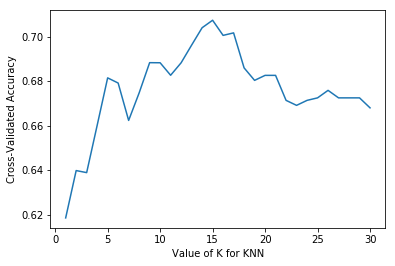

In [31]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [33]:
logreg = LogisticRegression(solver='lbfgs')
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.6904934173192602

In [47]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [43]:
melbourne_model.predict(X.head())

array([0.22572178, 0.60736196, 0.22572178, 0.60736196, 0.22572178])

In [49]:
cross_val_score(melbourne_model, X, y, cv=10, scoring='accuracy').mean()

ValueError: Classification metrics can't handle a mix of binary and continuous targets